In [52]:
%%writefile app.py

Writing app.py


In [2]:
import pandas as pd

# Load data with specified encoding
ratings = pd.read_csv('/content/drive/MyDrive/ml-1m/ratings.dat', sep='::', names=['userId', 'movieId', 'rating', 'timestamp'], engine='python', encoding='ISO-8859-1')
movies = pd.read_csv('/content/drive/MyDrive/ml-1m/movies.dat', sep='::', names=['movieId', 'title', 'genres'], engine='python', encoding='ISO-8859-1')


In [3]:
print(ratings.isnull().sum())
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


In [4]:
ratings = ratings.dropna()
movies = movies.dropna()


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
data = pd.merge(ratings, movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
movie_counts = data['movieId'].value_counts()
threshold = 50  # Example threshold
data = data[data['movieId'].isin(movie_counts[movie_counts > threshold].index)]


In [11]:
data

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
998084,5795,2283,1,958079786,"Sheltering Sky, The (1990)",Drama
998085,5812,2283,3,957944609,"Sheltering Sky, The (1990)",Drama
998086,5890,2283,2,957468153,"Sheltering Sky, The (1990)",Drama
998087,6012,2283,2,956780600,"Sheltering Sky, The (1990)",Drama


##EDA

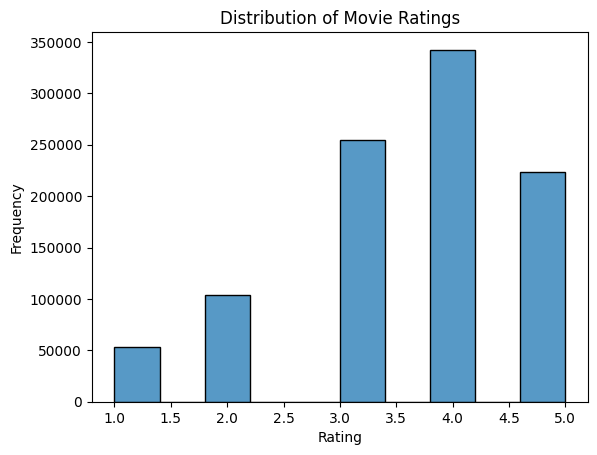

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()


In [13]:
top_movies = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(top_movies)


title
Sanjuro (1962)                                                         4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Name: rating, dtype: float64


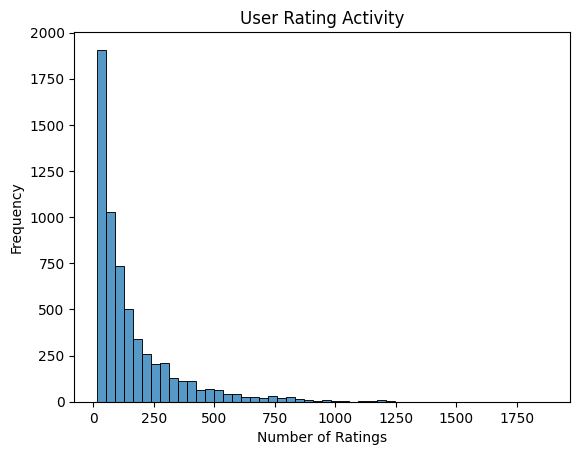

In [14]:
user_activity = data['userId'].value_counts()
sns.histplot(user_activity, bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('User Rating Activity')
plt.show()


OUTLIER DETECTION AND VIZ

In [15]:
rating_stats = data['rating'].describe()
print(rating_stats)

q1 = rating_stats['25%']
q3 = rating_stats['75%']
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['rating'] < lower_bound) | (data['rating'] > upper_bound)]
print(outliers)


count    977089.000000
mean          3.593479
std           1.111823
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
        userId  movieId  rating  timestamp  \
52         206     1193       1  976921007   
252        889     1193       1  975247862   
259        925     1193       1  975197334   
294       1051     1193       1  974957093   
311       1111     1193       1  974918663   
...        ...      ...     ...        ...   
995925    5530      270       1  959996988   
998047    2124     2283       1  974654135   
998062    3829     2283       1  965939557   
998065    3985     2283       1  965626466   
998084    5795     2283       1  958079786   

                                         title         genres  
52      One Flew Over the Cuckoo's Nest (1975)          Drama  
252     One Flew Over the Cuckoo's Nest (1975)          Drama  
259     One Flew Over the Cuckoo's Nest (1

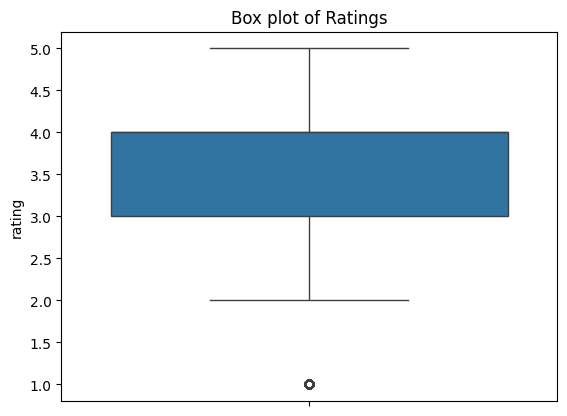

In [16]:
sns.boxplot(data['rating'])
plt.title('Box plot of Ratings')
plt.show()


##MODEL

In [17]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [18]:
!pip install surprise
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357264 sha256=a56a10bd7a11aedc6880fd055766e499ca004b3d438f38c7e07af10810fca011
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [19]:
reader = Reader(rating_scale=(0.5, 5.0))
surprise_data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)
model_svd = SVD()


In [20]:
from surprise import KNNBasic
model_knn = KNNBasic()

In [21]:
from surprise import NMF

model_nmf = NMF()

##MODEL EVALUATION

In [22]:
results_svd = cross_validate(model_svd, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
results_knn = cross_validate(model_knn, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
results_nmf = cross_validate(model_nmf, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Calculate mean RMSE for each model
mean_rmse_svd = sum(results_svd['test_rmse']) / len(results_svd['test_rmse'])
mean_rmse_knn = sum(results_knn['test_rmse']) / len(results_knn['test_rmse'])
mean_rmse_nmf = sum(results_nmf['test_rmse']) / len(results_nmf['test_rmse'])

print(f'SVD Mean RMSE: {mean_rmse_svd}')
print(f'KNN Mean RMSE: {mean_rmse_knn}')
print(f'NMF Mean RMSE: {mean_rmse_nmf}')

best_model = min((mean_rmse_svd, model_svd), (mean_rmse_knn, model_knn), (mean_rmse_nmf, model_nmf), key=lambda x: x[0])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
SVD Mean RMSE: 0.8860496134779904
KNN Mean RMSE: 0.9292048421764602
NMF Mean RMSE: 0.9170244772357641


In [23]:
best_model = min((mean_rmse_svd, model_svd), (mean_rmse_knn, model_knn), (mean_rmse_nmf, model_nmf), key=lambda x: x[0])[1]

In [24]:
best_model

<ipython-input-25-3ca51d2af795>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean RMSE', data=rmse_df,palette='pastel')


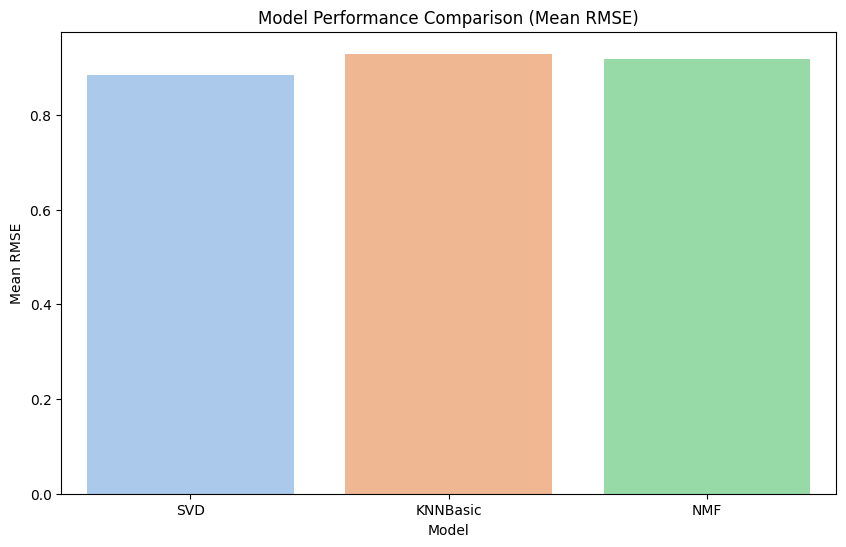

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppose these are the mean RMSE values of your models
mean_rmse_values = {
    'SVD': 0.885,
    'KNNBasic': 0.929,
    'NMF': 0.917
}

# Prepare data for visualization
models = []
rmse_values = []

for model, rmse in mean_rmse_values.items():
    models.append(model)
    rmse_values.append(rmse)

# Create a DataFrame
rmse_df = pd.DataFrame({
    'Model': models,
    'Mean RMSE': rmse_values
})

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean RMSE', data=rmse_df,palette='pastel')
plt.title('Model Performance Comparison (Mean RMSE)')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.show()

In [26]:
trainset = surprise_data.build_full_trainset()
best_model.fit(trainset)

import joblib
joblib.dump(best_model, 'collaborative_model.pkl')

['collaborative_model.pkl']

In [27]:
# Load collaborative filtering model
collab_model = joblib.load('collaborative_model.pkl')

def recommend_movies(user_id, num_recommendations=10):
    user_movies = data[data['userId'] == user_id]['movieId'].unique()
    recommendations = []

    for movie_id in data['movieId'].unique():
        if movie_id not in user_movies:
            pred = collab_model.predict(user_id, movie_id)
            movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
            recommendations.append((movie_title, pred.est))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommendations[:num_recommendations]
    recommended_titles = [title for title, _ in top_recommendations]

    return recommended_titles

# Example: Recommend movies for user with ID 1
user_id = 1
recommended_movies = recommend_movies(user_id)
print("Recommended movies for user", user_id, ":", recommended_movies)

Recommended movies for user 1 : ['Sanjuro (1962)', 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)', 'Gone with the Wind (1939)', 'Lawrence of Arabia (1962)', 'Shawshank Redemption, The (1994)', 'West Side Story (1961)', 'To Live (Huozhe) (1994)', '12 Angry Men (1957)', 'Wrong Trousers, The (1993)', 'Exorcist, The (1973)']


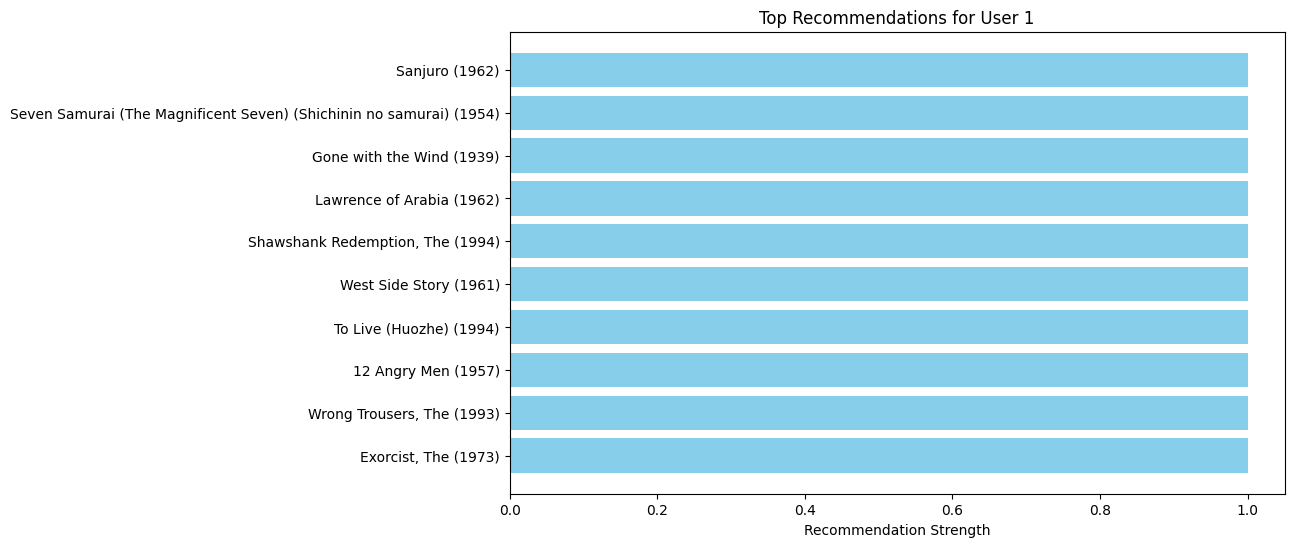

In [28]:
import matplotlib.pyplot as plt

# Plotting the recommendations
plt.figure(figsize=(10, 6))
plt.barh(range(len(recommended_movies)), [1] * len(recommended_movies), color='skyblue')
plt.yticks(range(len(recommended_movies)), recommended_movies)
plt.xlabel('Recommendation Strength')
plt.title('Top Recommendations for User ' + str(user_id))
plt.gca().invert_yaxis()
plt.show()


##CONTENT BASED FILTERING

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
# Preprocess genres
movies['genres'] = movies['genres'].str.replace('|', ' ')

In [31]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

In [32]:
# Compute cosine similarity
content_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
content_sim

array([[1.        , 0.30552517, 0.19737232, ..., 0.        , 0.        ,
        0.        ],
       [0.30552517, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19737232, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.52384694],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.52384694],
       [0.        , 0.        , 0.        , ..., 0.52384694, 0.52384694,
        1.        ]])

In [33]:
def content_based_recommendations(movie_title, num_recommendations=10):
    movie_idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(content_sim[movie_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Example: Recommend movies similar to 'Toy Story'
movie_title = 'Toy Story (1995)'
content_based_rec = content_based_recommendations(movie_title)
print("Content-Based Recommendations for", movie_title, ":", content_based_rec)

Content-Based Recommendations for Toy Story (1995) : 1050            Aladdin and the King of Thieves (1996)
2072                          American Tail, An (1986)
2073        American Tail: Fievel Goes West, An (1991)
2285                         Rugrats Movie, The (1998)
2286                              Bug's Life, A (1998)
3045                                Toy Story 2 (1999)
3542                             Saludos Amigos (1943)
3682                                Chicken Run (2000)
3685    Adventures of Rocky and Bullwinkle, The (2000)
12                                        Balto (1995)
Name: title, dtype: object


## HYBRID RECOMMENDATION SYSTEM

In [34]:
def hybrid_recommendations(user_id, movie_title, num_recommendations=10):
    collab_pred = best_model.predict(user_id, movies[movies['title'] == movie_title]['movieId'].iloc[0]).est
    content_based_rec = content_based_recommendations(movie_title, num_recommendations)
    hybrid_scores = {}
    for title in content_based_rec:
        movie_id = movies[movies['title'] == title]['movieId'].iloc[0]
        hybrid_scores[title] = (collab_pred + best_model.predict(user_id, movie_id).est) / 2
    sorted_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    return [rec[0] for rec in sorted_recommendations[:num_recommendations]]

# Example: Recommend movies for user 1 based on their liking for 'Toy Story'
user_id = 1
recommended_movies = hybrid_recommendations(user_id, movie_title)
print("Hybrid Recommendations for User", user_id, "based on", movie_title, ":", recommended_movies)


Hybrid Recommendations for User 1 based on Toy Story (1995) : ['Toy Story 2 (1999)', "Bug's Life, A (1998)", 'Chicken Run (2000)', 'American Tail, An (1986)', 'Saludos Amigos (1943)', 'Balto (1995)', 'American Tail: Fievel Goes West, An (1991)', 'Aladdin and the King of Thieves (1996)', 'Rugrats Movie, The (1998)', 'Adventures of Rocky and Bullwinkle, The (2000)']


Hybrid Recommendations for User 1 based on Toy Story (1995) : ['Toy Story 2 (1999)', "Bug's Life, A (1998)", 'Chicken Run (2000)', 'American Tail, An (1986)', 'Saludos Amigos (1943)', 'Balto (1995)', 'American Tail: Fievel Goes West, An (1991)', 'Aladdin and the King of Thieves (1996)', 'Rugrats Movie, The (1998)', 'Adventures of Rocky and Bullwinkle, The (2000)']


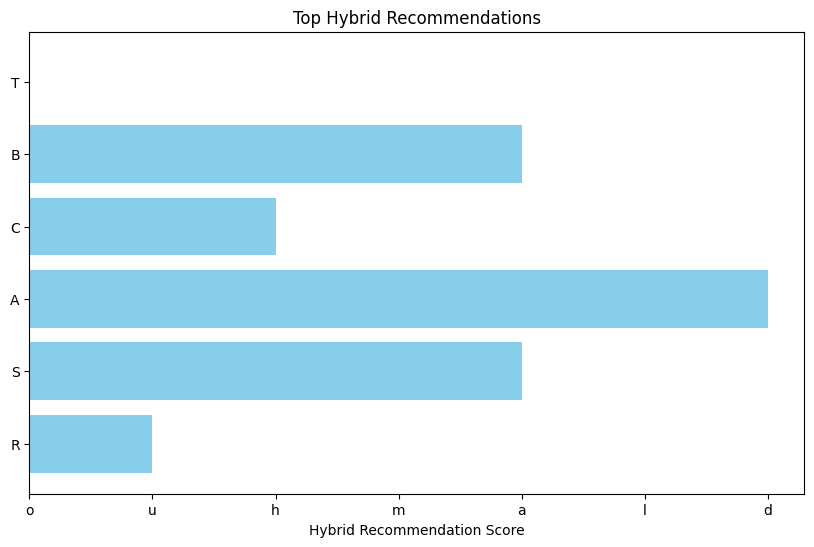

In [35]:
import matplotlib.pyplot as plt

def plot_recommendations(recommendations):
    movie_titles = [rec[0] for rec in recommendations]
    scores = [rec[1] for rec in recommendations]

    plt.figure(figsize=(10, 6))
    plt.barh(movie_titles, scores, color='skyblue')
    plt.xlabel('Hybrid Recommendation Score')
    plt.title('Top Hybrid Recommendations')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
    plt.show()

# Example: Recommend movies for user 1 based on their liking for 'Toy Story'
user_id = 1
recommended_movies = hybrid_recommendations(user_id, movie_title)
print("Hybrid Recommendations for User", user_id, "based on", movie_title, ":", recommended_movies)

# Plot the recommendations
plot_recommendations(recommended_movies)


## STREAMLIT APP

In [37]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [38]:
import streamlit as st

In [57]:
st.set_page_config(page_title='Movie Recommendation System', layout='wide')

st.title('Movie Recommendation System')

st.sidebar.header('User Input Features')
user_id = st.sidebar.slider('Select User ID:', min_value=1, max_value=100, value=1)
movie_title = st.sidebar.text_input('Enter a Movie Title:')

if st.sidebar.button('Get Recommendations'):
    if movie_title:
        with st.spinner('Generating recommendations...'):
            recommended_movies = hybrid_recommendations(user_id, movie_title)
        if recommended_movies:
            st.success('Recommendations generated!')

            st.subheader('Top Recommendations:')
            for idx, (rec, score) in enumerate(recommended_movies):
                st.write(f"{idx+1}. {rec} (Score: {score:.2f})")

            st.subheader('Visualization of Recommendations:')
            plot_recommendations(recommended_movies)
    else:
        st.error('Please enter a movie title.')

st.sidebar.subheader('About')
st.sidebar.info("This app provides movie recommendations based on a hybrid model combining collaborative filtering and content-based filtering. Adjust the user ID and enter a movie title to get personalized recommendations.")

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [55]:
! wget -q -O - ipv4.icanhazip.com


35.199.172.78


In [56]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.199.172.78:8501

npx: installed 22 in 7.049s
your url is: https://lazy-areas-enter.loca.lt
2024-06-07 04:54:58.191 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 600, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 11, in <module>
    movies = pd.read_csv('movies.dat', sep='::', names=['movieId', 'title', 'genres'], engine='python', encoding='ISO-8859-1')
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 577, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-pa